# This notebook is used to cluster Toronto neighborhoods by usin k-mean algorithm for an investment oppernutity

## Two data souces for this work are Wikipedia (for postcode) and Foursquare (for location specific venue data)

We start by importing the relevent libraries that will be used to extract data and convert it into a data frames suitbale for further analysis

In [1]:
import pandas as pd  # to make data frame similar to excel table
import numpy as np   # to handle multidimenional arrays
from bs4 import BeautifulSoup # extract data from webpage
import requests # library for makinh HTTP requests

## 1. Accesing webpage containing the neighborhood and postal code information thorugh requests and storing it to a text file named here as 'rawdata'

In [2]:
rawdata=requests.get('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M').text
#print (rawdata) # remove '#' in the beginning to see how raw data looks like
soup  = BeautifulSoup(rawdata,'lxml')# we create a Beautifulsoup object and then print to see how it looks like further
#details can be found at https://www.crummy.com/software/BeautifulSoup/bs4/doc/ 
print(soup.prettify()) # Displaying the 

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   List of postal codes of Canada: M - Wikipedia
  </title>
  <script>
   document.documentElement.className = document.documentElement.className.replace( /(^|\s)client-nojs(\s|$)/, "$1client-js$2" );
  </script>
  <script>
   (window.RLQ=window.RLQ||[]).push(function(){mw.config.set({"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"List_of_postal_codes_of_Canada:_M","wgTitle":"List of postal codes of Canada: M","wgCurRevisionId":876823784,"wgRevisionId":876823784,"wgArticleId":539066,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Communications in Ontario","Postal codes in Canada","Toronto","Ontario-related lists"],"wgBreakFrames":false,"wgPageContentLanguage":"en","wgPageContentModel":"wikitext","wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wg

In [3]:
# navigate that data structure
soup.title

<title>List of postal codes of Canada: M - Wikipedia</title>

In [4]:
# navigate that data structure
soup.table   # remove # in the beginng of line to see the table name in the wikipedia page wich is "wikitable sortable"

<table class="wikitable sortable">
<tbody><tr>
<th>Postcode</th>
<th>Borough</th>
<th>Neighbourhood
</th></tr>
<tr>
<td>M1A</td>
<td>Not assigned</td>
<td>Not assigned
</td></tr>
<tr>
<td>M2A</td>
<td>Not assigned</td>
<td>Not assigned
</td></tr>
<tr>
<td>M3A</td>
<td><a href="/wiki/North_York" title="North York">North York</a></td>
<td><a href="/wiki/Parkwoods" title="Parkwoods">Parkwoods</a>
</td></tr>
<tr>
<td>M4A</td>
<td><a href="/wiki/North_York" title="North York">North York</a></td>
<td><a href="/wiki/Victoria_Village" title="Victoria Village">Victoria Village</a>
</td></tr>
<tr>
<td>M5A</td>
<td><a href="/wiki/Downtown_Toronto" title="Downtown Toronto">Downtown Toronto</a></td>
<td><a href="/wiki/Harbourfront_(Toronto)" title="Harbourfront (Toronto)">Harbourfront</a>
</td></tr>
<tr>
<td>M5A</td>
<td><a href="/wiki/Downtown_Toronto" title="Downtown Toronto">Downtown Toronto</a></td>
<td><a href="/wiki/Regent_Park" title="Regent Park">Regent Park</a>
</td></tr>
<tr>
<td>M6A</td>

## 1.1 We create dataframe using Pandas

In [5]:
mtable = soup.find_all('table') # extractingmain table or mtable from wikipedia page
df_tpcn = pd.read_html(str(mtable[0]), index_col=None, header=0)[0] # assigning to data frame the extracted mtable
#where tpcn stands for Toronto postal code neighborhood
df_tpcn.head()

,Postcode,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront


### Displaying dataframe characteristics (types, info, total count and unique values etc etc)

In [6]:
df_tpcn.dtypes

Postcode         object
Borough          object
Neighbourhood    object
dtype: object

In [7]:
df_tpcn.info

<bound method DataFrame.info of     Postcode           Borough  \
0        M1A      Not assigned   
1        M2A      Not assigned   
2        M3A        North York   
3        M4A        North York   
4        M5A  Downtown Toronto   
5        M5A  Downtown Toronto   
6        M6A        North York   
7        M6A        North York   
8        M7A      Queen's Park   
9        M8A      Not assigned   
10       M9A         Etobicoke   
11       M1B       Scarborough   
12       M1B       Scarborough   
13       M2B      Not assigned   
14       M3B        North York   
15       M4B         East York   
16       M4B         East York   
17       M5B  Downtown Toronto   
18       M5B  Downtown Toronto   
19       M6B        North York   
20       M7B      Not assigned   
21       M8B      Not assigned   
22       M9B         Etobicoke   
23       M9B         Etobicoke   
24       M9B         Etobicoke   
25       M9B         Etobicoke   
26       M9B         Etobicoke   
27       M1C    

In [8]:
df_tpcn.describe ()

,Postcode,Borough,Neighbourhood
count,289,289,289
unique,180,12,210
top,M9V,Not assigned,Not assigned
freq,8,77,78


## 1.2 Data Wrangling i.e. cleaning and removing rows where Borough is not assigned

In [9]:
df_tpcn_cleaned = df_tpcn[df_tpcn.Borough != 'Not assigned'] # dropping rows where Borough is not assigned

In [10]:
df_tpcn_cleaned.describe ()

,Postcode,Borough,Neighbourhood
count,212,212,212
unique,103,11,210
top,M9V,Etobicoke,St. James Town
freq,8,45,2


In [11]:
df_tpcn_cleaned.head(11) # displaying first 11 rows

,Postcode,Borough,Neighbourhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront
5,M5A,Downtown Toronto,Regent Park
6,M6A,North York,Lawrence Heights
7,M6A,North York,Lawrence Manor
8,M7A,Queen's Park,Not assigned
10,M9A,Etobicoke,Islington Avenue
11,M1B,Scarborough,Rouge
12,M1B,Scarborough,Malvern


### 1.2.1 We group Borough and Neighborhoods by their Postcode and reset the dataframe index to start from 0

In [12]:
df_tpcn_cleaned = df_tpcn_cleaned.groupby(['Postcode','Borough'])['Neighbourhood'].apply(','.join).reset_index()
df_tpcn_cleaned.head(110)

,Postcode,Borough,Neighbourhood
0,M1B,Scarborough,"Rouge,Malvern"
1,M1C,Scarborough,"Highland Creek,Rouge Hill,Port Union"
2,M1E,Scarborough,"Guildwood,Morningside,West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae
5,M1J,Scarborough,Scarborough Village
6,M1K,Scarborough,"East Birchmount Park,Ionview,Kennedy Park"
7,M1L,Scarborough,"Clairlea,Golden Mile,Oakridge"
8,M1M,Scarborough,"Cliffcrest,Cliffside,Scarborough Village West"
9,M1N,Scarborough,"Birch Cliff,Cliffside West"


### In above display we see some Neighbohoods name are not assigned. So we name them same as their Borough name

In [13]:
df_tpcn_cleaned.loc[df_tpcn_cleaned.Neighbourhood == 'Not assigned', 'Neighbourhood'] = df_tpcn_cleaned.Borough
df_tpcn_cleaned.head(104)

,Postcode,Borough,Neighbourhood
0,M1B,Scarborough,"Rouge,Malvern"
1,M1C,Scarborough,"Highland Creek,Rouge Hill,Port Union"
2,M1E,Scarborough,"Guildwood,Morningside,West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae
5,M1J,Scarborough,Scarborough Village
6,M1K,Scarborough,"East Birchmount Park,Ionview,Kennedy Park"
7,M1L,Scarborough,"Clairlea,Golden Mile,Oakridge"
8,M1M,Scarborough,"Cliffcrest,Cliffside,Scarborough Village West"
9,M1N,Scarborough,"Birch Cliff,Cliffside West"


In [14]:
df_tpcn_cleaned.shape

(103, 3)

### 1.2.2 Geospatial coordinate assignments to corresponding Postcode and Merging dataframes

In [15]:
ll=pd.read_csv("GC.csv") # here ll dataframe stands for latitude and longitude

In [16]:
ll.shape

(103, 3)

In [17]:
ll.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 3 columns):
Postal Code    103 non-null object
Latitude       103 non-null float64
Longitude      103 non-null float64
dtypes: float64(2), object(1)
memory usage: 2.5+ KB


In [18]:
ll.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


As we have to match postcode and latitude and longitude, we rename Postal Code column to Postcode, so that we can assign matching geospatial coordinates or latitude and longitude

In [19]:
ll = ll.rename(columns={'Postal Code':'Postcode'})

In [20]:
ll.head()

,Postcode,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


we merge previous and current data frames and put the tell pandas to put latitude and longitude as outer columns

In [21]:
tpcnll= pd.merge(df_tpcn_cleaned, ll, on='Postcode', how='outer')

In [22]:
tpcnll.head()

,Postcode,Borough,Neighbourhood,Latitude,Longitude
0,M1B,Scarborough,"Rouge,Malvern",43.806686,-79.194353
1,M1C,Scarborough,"Highland Creek,Rouge Hill,Port Union",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood,Morningside,West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476


We export this dataframe for a backup

In [23]:
tpcnll.to_csv('Toronto_postcode_neighborhoods_latlong_f.csv')

# 2. Visulizing the Toronto Neighborhoods 

### 2.1 Importing matplot and folium library for map visulization

In [24]:
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


In [25]:
neighborhoods=tpcnll #assigning data frame new name neighborhoods

In [26]:
neighborhoods.head()

,Postcode,Borough,Neighbourhood,Latitude,Longitude
0,M1B,Scarborough,"Rouge,Malvern",43.806686,-79.194353
1,M1C,Scarborough,"Highland Creek,Rouge Hill,Port Union",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood,Morningside,West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476


Obtaining Toronto's geospatial coordinates by using geocode library

In [27]:
address = 'Toronto, Ontario'
geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto City are {}, {}.'.format(latitude, longitude))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Using Nominatim with the default "geopy/1.18.1" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  


The geograpical coordinate of Toronto City are 43.653963, -79.387207.


### 2.2 Displaying the Toronto Neighborhoods on Map

In [28]:
# create map of Toronto using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Borough'], neighborhoods['Neighbourhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

<img src="nh.png">

## 3. Venue data from Foursquare

In [2]:
#@hidden_cell
CLIENT_ID = '$$$' # your Foursquare ID
CLIENT_SECRET = '$$$' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

#print('Your credentails:')
#print('CLIENT_ID: ' + CLIENT_ID)
#print('CLIENT_SECRET:' + CLIENT_SECRET)

### 3.1  Now we explore one of the neighborhood 

In [30]:
toronto_data=neighborhoods # renaming the data frame for easy recognition
toronto_data.loc[69, 'Neighbourhood']

'Stn A PO Boxes 25 The Esplanade'

#### Getting latitude and Lonigitude of  these Neighbourhood 

In [31]:
latitude = toronto_data.loc[69, 'Latitude'] # neighborhood latitude value
neighborhood_latitude=latitude 
longitude = toronto_data.loc[69, 'Longitude'] # neighborhood longitude value
neighborhood_longitude=longitude
neighborhood_name = toronto_data.loc[69, 'Neighbourhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Stn A PO Boxes 25 The Esplanade are 43.6464352, -79.37484599999999.


#### Now, we get the top 100 venues that are within a radius of 500 meters of 'Stn A PO Boxes 25 The Esplanade' 

In [32]:
# type your answer here
LIMIT = 100
radius = 500
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, radius, LIMIT)
#url

In [33]:
#Send the GET request and examine the resutls
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5c9989794434b96148e45fa9'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'St. Lawrence',
  'headerFullLocation': 'St. Lawrence, Toronto',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 94,
  'suggestedBounds': {'ne': {'lat': 43.6509352045, 'lng': -79.36863880887294},
   'sw': {'lat': 43.6419351955, 'lng': -79.38105319112704}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4ad4c05ef964a520d8f620e3',
       'name': 'Hockey Hall Of Fame (Hockey Hall of Fame)',
       'location': {'address': '30 Yonge St.',
        'crossStreet': 'at Brookfield Pl.',
        'lat': 43.646974451431056,
        'lng': -79.37732323942681,
        

Now we get categories of venues in our recent Foursquare fetched data

In [34]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

Now we convert venue data to a dataframe for further analysis

In [35]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Hockey Hall Of Fame (Hockey Hall of Fame),Museum,43.646974,-79.377323
1,The Keg Steakhouse + Bar,Steakhouse,43.646676,-79.374822
2,Sukhothai,Thai Restaurant,43.648487,-79.374547
3,Fresh On Front,Vegetarian / Vegan Restaurant,43.647888,-79.374586
4,Berczy Park,Park,43.648048,-79.375172


lets check how many venues we have got from Foursquare

In [36]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

94 venues were returned by Foursquare.


## 3.2 Now we use a function to find venues in all of the neighborhoods for Toronto

In [37]:
# Downtown latitude and longitude are
latitude = 43.655115
longitude = -79.380219

In [38]:
def getNearbyVenues(names, latitudes, longitudes, radius=700):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

#### Now write the code to run the above function on each neighborhood and create a new dataframe called *toronto_venues*.

In [39]:
# type your answer here

toronto_venues = getNearbyVenues(names=toronto_data['Neighbourhood'],
                                   latitudes=toronto_data['Latitude'],
                                   longitudes=toronto_data['Longitude']
                                  )

Rouge,Malvern
Highland Creek,Rouge Hill,Port Union
Guildwood,Morningside,West Hill
Woburn
Cedarbrae
Scarborough Village
East Birchmount Park,Ionview,Kennedy Park
Clairlea,Golden Mile,Oakridge
Cliffcrest,Cliffside,Scarborough Village West
Birch Cliff,Cliffside West
Dorset Park,Scarborough Town Centre,Wexford Heights
Maryvale,Wexford
Agincourt
Clarks Corners,Sullivan,Tam O'Shanter
Agincourt North,L'Amoreaux East,Milliken,Steeles East
L'Amoreaux West,Steeles West
Upper Rouge
Hillcrest Village
Fairview,Henry Farm,Oriole
Bayview Village
Silver Hills,York Mills
Newtonbrook,Willowdale
Willowdale South
York Mills West
Willowdale West
Parkwoods
Don Mills North
Flemingdon Park,Don Mills South
Bathurst Manor,Downsview North,Wilson Heights
Northwood Park,York University
CFB Toronto,Downsview East
Downsview West
Downsview Central
Downsview Northwest
Victoria Village
Woodbine Gardens,Parkview Hill
Woodbine Heights
The Beaches
Leaside
Thorncliffe Park
East Toronto
The Danforth West,Riverdale
The Beac

#### Let's check the size of the resulting dataframe

In [40]:
print(toronto_venues.shape)
toronto_venues.head(11)

(3431, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Rouge,Malvern",43.806686,-79.194353,Images Salon & Spa,43.802283,-79.198565,Spa
1,"Rouge,Malvern",43.806686,-79.194353,Wendy's,43.807448,-79.199056,Fast Food Restaurant
2,"Rouge,Malvern",43.806686,-79.194353,Wendy's,43.802008,-79.198080,Fast Food Restaurant
3,"Rouge,Malvern",43.806686,-79.194353,Tim Hortons,43.802000,-79.198169,Coffee Shop
4,"Rouge,Malvern",43.806686,-79.194353,Lee Valley,43.803161,-79.199681,Hobby Shop
5,"Rouge,Malvern",43.806686,-79.194353,FASTSIGNS,43.807882,-79.201968,Business Service
6,"Rouge,Malvern",43.806686,-79.194353,Tim Hortons / Esso,43.801660,-79.199133,Coffee Shop
7,"Highland Creek,Rouge Hill,Port Union",43.784535,-79.160497,Shamrock Burgers,43.783823,-79.168406,Burger Joint
8,"Highland Creek,Rouge Hill,Port Union",43.784535,-79.160497,Ted's Restaurant,43.784468,-79.169200,Breakfast Spot
9,"Highland Creek,Rouge Hill,Port Union",43.784535,-79.160497,Royal Canadian Legion,43.782533,-79.163085,Bar


Let's check how many venues were returned for each neighborhood

In [41]:
toronto_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
"Adelaide,King,Richmond",100,100,100,100,100,100
Agincourt,9,9,9,9,9,9
"Agincourt North,L'Amoreaux East,Milliken,Steeles East",15,15,15,15,15,15
"Albion Gardens,Beaumond Heights,Humbergate,Jamestown,Mount Olive,Silverstone,South Steeles,Thistletown",13,13,13,13,13,13
"Alderwood,Long Branch",12,12,12,12,12,12
"Bathurst Manor,Downsview North,Wilson Heights",19,19,19,19,19,19
Bayview Village,9,9,9,9,9,9
"Bedford Park,Lawrence Manor East",31,31,31,31,31,31
Berczy Park,100,100,100,100,100,100


#### Let's find out how many unique categories can be curated from all the returned venues

In [42]:
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 315 uniques categories.


### We check the most frequent venues

In [43]:
toronto_venues.groupby('Venue Category').count()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude
Venue Category,,,,,,
Accessories Store,6,6,6,6,6,6
Adult Boutique,1,1,1,1,1,1
Afghan Restaurant,3,3,3,3,3,3
Airport,2,2,2,2,2,2
Airport Food Court,1,1,1,1,1,1
Airport Gate,1,1,1,1,1,1
Airport Lounge,2,2,2,2,2,2
Airport Service,2,2,2,2,2,2
Airport Terminal,3,3,3,3,3,3


### 3.3 We Analyze Each Neighborhood

### Now we have to find the frequency of occurance of venue for every neighborhood

In [44]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

toronto_onehot.head()

,Yoga Studio,Accessories Store,Adult Boutique,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,...,University,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Wings Joint,Women's Store
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
toronto_onehot.shape

(3431, 315)

#### Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [46]:
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grouped

,Neighborhood,Yoga Studio,Accessories Store,Adult Boutique,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,...,University,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Wings Joint,Women's Store
0,"Adelaide,King,Richmond",0.000000,0.010000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00,0.010000,0.000000,0.000000,0.000000,0.000000,0.0100,0.000000,0.000000,0.000000
1,Agincourt,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000
2,"Agincourt North,L'Amoreaux East,Milliken,Steel...",0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000
3,"Albion Gardens,Beaumond Heights,Humbergate,Jam...",0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000
4,"Alderwood,Long Branch",0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000
5,"Bathurst Manor,Downsview North,Wilson Heights",0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00,0.000000,0.000000,0.052632,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000
6,Bayview Village,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000
7,"Bedford Park,Lawrence Manor East",0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.032258,0.000000,0.000000
8,Berczy Park,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00,0.010000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000
9,"Birch Cliff,Cliffside West",0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000


In [47]:
toronto_grouped.to_csv('toronto_grouped.csv')

In [48]:
toronto_grouped.shape

(101, 315)

### Let's print each neighborhood along with the top 15 most common venues

In [49]:
num_top_venues = 15

for hood in toronto_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = toronto_grouped[toronto_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Adelaide,King,Richmond----
                  venue  freq
0           Coffee Shop  0.07
1                  Café  0.06
2            Steakhouse  0.04
3      Sushi Restaurant  0.04
4                   Bar  0.04
5                 Hotel  0.03
6   American Restaurant  0.03
7               Theater  0.03
8            Restaurant  0.02
9      Asian Restaurant  0.02
10       Breakfast Spot  0.02
11         Concert Hall  0.02
12       Cosmetics Shop  0.02
13      Thai Restaurant  0.02
14               Bakery  0.02


----Agincourt----
                  venue  freq
0             Pool Hall  0.11
1       Badminton Court  0.11
2        Sandwich Place  0.11
3        Breakfast Spot  0.11
4     Convenience Store  0.11
5                Lounge  0.11
6   Shanghai Restaurant  0.11
7       Motorcycle Shop  0.11
8          Skating Rink  0.11
9         Moving Target  0.00
10          Music Store  0.00
11         Music School  0.00
12               Museum  0.00
13  Monument / Landmark  0.00
14        Movie The

                  venue  freq
0      Airport Terminal  0.13
1       Harbor / Marina  0.13
2      Sculpture Garden  0.09
3   Rental Car Location  0.09
4         Boat or Ferry  0.09
5        Airport Lounge  0.09
6       Airport Service  0.09
7                Tunnel  0.04
8           Music Venue  0.04
9              Boutique  0.04
10         Airport Gate  0.04
11   Airport Food Court  0.04
12              Airport  0.04
13          Coffee Shop  0.04
14        Moving Target  0.00


----Cabbagetown,St. James Town----
                       venue  freq
0                Coffee Shop  0.12
1                 Restaurant  0.07
2                       Café  0.05
3                       Park  0.04
4                Pizza Place  0.04
5              Grocery Store  0.04
6                     Bakery  0.03
7                      Diner  0.03
8        Japanese Restaurant  0.03
9                  Gastropub  0.03
10                       Pub  0.03
11        Italian Restaurant  0.03
12                Beer Store

14   Monument / Landmark  0.00


----Dorset Park,Scarborough Town Centre,Wexford Heights----
                        venue  freq
0           Indian Restaurant  0.14
1           Electronics Store  0.14
2        Fast Food Restaurant  0.07
3                      Bakery  0.07
4          Chinese Restaurant  0.07
5        Gym / Fitness Center  0.07
6                 Coffee Shop  0.07
7                   Pet Store  0.07
8   Latin American Restaurant  0.07
9       Vietnamese Restaurant  0.07
10                  Wine Shop  0.07
11                Wings Joint  0.07
12                     Museum  0.00
13               Music School  0.00
14                Music Store  0.00


----Dovercourt Village,Dufferin----
                        venue  freq
0                      Bakery  0.06
1                 Coffee Shop  0.06
2                  Smoke Shop  0.06
3                    Pharmacy  0.06
4                 Supermarket  0.06
5              Discount Store  0.06
6                         Gym  0.06
7    

                              venue  freq
0                    Baseball Field  0.33
1                        Playground  0.33
2                         Locksmith  0.33
3                       Yoga Studio  0.00
4                       Music Store  0.00
5                      Music School  0.00
6                            Museum  0.00
7                     Moving Target  0.00
8                     Movie Theater  0.00
9                   Motorcycle Shop  0.00
10              Monument / Landmark  0.00
11  Molecular Gastronomy Restaurant  0.00
12                       Nail Salon  0.00
13       Modern European Restaurant  0.00
14                Mobile Phone Shop  0.00


----Humber Summit----
                              venue  freq
0                            Bakery  0.50
1                       Pizza Place  0.25
2               Empanada Restaurant  0.25
3                       Yoga Studio  0.00
4   Molecular Gastronomy Restaurant  0.00
5                      Music School  0.00
6         

14        Sandwich Place  0.02


----Northwest----
                              venue  freq
0                             Hotel  0.25
1               Rental Car Location  0.25
2                      Home Service  0.25
3                         Drugstore  0.25
4                       Music Venue  0.00
5                       Music Store  0.00
6                      Music School  0.00
7                            Museum  0.00
8                     Moving Target  0.00
9                     Movie Theater  0.00
10                  Motorcycle Shop  0.00
11                      Yoga Studio  0.00
12          New American Restaurant  0.00
13              Monument / Landmark  0.00
14  Molecular Gastronomy Restaurant  0.00


----Northwood Park,York University----
                   venue  freq
0   Fast Food Restaurant  0.12
1         Massage Studio  0.12
2            Pizza Place  0.12
3            Coffee Shop  0.12
4    Japanese Restaurant  0.12
5     Miscellaneous Shop  0.12
6                  

14            Board Shop  0.02


----The Danforth West,Riverdale----
                   venue  freq
0       Greek Restaurant  0.13
1            Coffee Shop  0.08
2   Fast Food Restaurant  0.04
3                    Pub  0.04
4                   Café  0.04
5         Ice Cream Shop  0.03
6     Italian Restaurant  0.03
7          Grocery Store  0.03
8                 Bakery  0.02
9            Pizza Place  0.02
10            Restaurant  0.02
11        Sandwich Place  0.02
12           Yoga Studio  0.02
13      Cuban Restaurant  0.01
14                 Diner  0.01


----The Junction North,Runnymede----
                     venue  freq
0              Pizza Place  0.14
1                  Brewery  0.09
2       Athletics & Sports  0.09
3              Coffee Shop  0.05
4                 Bus Line  0.05
5      Fried Chicken Joint  0.05
6   Furniture / Home Store  0.05
7                     Bank  0.05
8           Sandwich Place  0.05
9           Discount Store  0.05
10       Indian Restaurant  0.05


#### Let's transform these into a *pandas* dataframe

In [50]:
# The following function will be used for sorting in descending order
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Stoe and display the top 10 venues for each neighborhood in a new dataframe

In [52]:
num_top_venues = 15

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head(11)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue
0,"Adelaide,King,Richmond",Coffee Shop,Café,Steakhouse,Bar,Sushi Restaurant,Hotel,American Restaurant,Theater,Gym,Breakfast Spot,Bakery,Burger Joint,Restaurant,Asian Restaurant,Thai Restaurant
1,Agincourt,Convenience Store,Motorcycle Shop,Lounge,Badminton Court,Breakfast Spot,Pool Hall,Shanghai Restaurant,Skating Rink,Sandwich Place,Dive Bar,Dim Sum Restaurant,Diner,Discount Store,Women's Store,Dog Run
2,"Agincourt North,L'Amoreaux East,Milliken,Steel...",BBQ Joint,Pizza Place,Chinese Restaurant,Shop & Service,Gym,Malay Restaurant,Pharmacy,Park,Bakery,Fast Food Restaurant,Caribbean Restaurant,Noodle House,Dessert Shop,Dim Sum Restaurant,Diner
3,"Albion Gardens,Beaumond Heights,Humbergate,Jam...",Grocery Store,Hardware Store,Sandwich Place,Pizza Place,Fast Food Restaurant,Beer Store,Liquor Store,Discount Store,Japanese Restaurant,Fried Chicken Joint,Pharmacy,Coffee Shop,Community Center,Donut Shop,Diner
4,"Alderwood,Long Branch",Pizza Place,Pharmacy,Pool,Skating Rink,Sandwich Place,Convenience Store,Gas Station,Pub,Athletics & Sports,Coffee Shop,Gym,Discount Store,Deli / Bodega,Department Store,Design Studio
5,"Bathurst Manor,Downsview North,Wilson Heights",Coffee Shop,Bridal Shop,Bank,Sushi Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Restaurant,Supermarket,Diner,Fast Food Restaurant,Deli / Bodega,Community Center,Shopping Mall,Video Store,Pizza Place
6,Bayview Village,Bank,Café,Skating Rink,Japanese Restaurant,Restaurant,Skate Park,Chinese Restaurant,Grocery Store,Drugstore,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Design Studio,Doner Restaurant,Dog Run
7,"Bedford Park,Lawrence Manor East",Coffee Shop,Italian Restaurant,Sushi Restaurant,Fast Food Restaurant,Grocery Store,Bakery,Sandwich Place,Butcher,Café,Restaurant,Pub,Hardware Store,Pharmacy,Thai Restaurant,Comfort Food Restaurant
8,Berczy Park,Coffee Shop,Café,Hotel,Restaurant,Pub,Park,Seafood Restaurant,Cocktail Bar,Art Gallery,Pizza Place,Bakery,Beer Bar,Creperie,Cheese Shop,Farmers Market
9,"Birch Cliff,Cliffside West",Skating Rink,General Entertainment,Café,Diner,Discount Store,Bank,Thai Restaurant,Park,College Stadium,Eastern European Restaurant,Dumpling Restaurant,Drugstore,Donut Shop,Design Studio,Doner Restaurant


Export data for backup

In [53]:
neighborhoods_venues_sorted.to_csv('Toronto_neighborhoods_venues_sortedo.csv')

## 4. Cluster Neighborhoods

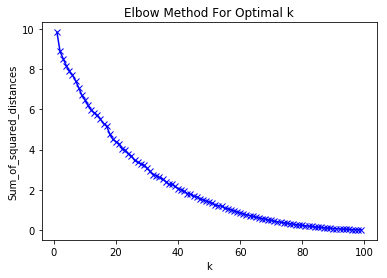

In [61]:
# set number of clusters
#kclusters = 11
import matplotlib.pyplot as plt
toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)

Sum_of_squared_distances = []
K = range(1,100)
for k in K:
    km = KMeans(n_clusters=k, random_state=0)
    km = km.fit(toronto_grouped_clustering)
    Sum_of_squared_distances.append(km.inertia_)

# run k-means clustering
#kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()
# check cluster labels generated for each row in the dataframe
#kmeans.labels_[0:101] 

<img src="k.png">

In [74]:
kclusters = 11
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)
kmeans.labels_[0:101] 

array([ 1,  1,  0,  0,  0,  0,  1,  1,  1,  1,  4,  1,  1,  3,  1,  1,  4,
        1,  1,  1,  1,  1,  1,  1,  0,  1,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  0,  0,  1,  1,  1,  1,  1,  1,  4,  0,  0,  1,  1,  1,
        1,  8,  1,  1,  7,  9,  5,  4,  0,  1,  0,  1,  4,  1,  1,  4,  1,
        4,  3,  1,  1,  0,  1,  2,  1,  2, 10,  6,  1,  1,  6,  1,  1,  1,
        1,  1,  1,  1,  0,  1,  1,  1,  0,  1,  1,  0,  3,  0,  4,  4])

Let's create a new dataframe that includes the cluster as well as the top 20 venues for each neighborhood.

In [82]:
t_merged = pd.read_csv('tll1.csv')
#t_merged.head()
#Downtown_merged=pd.DataFrame()
# add clustering labels
t_merged['Cluster Labels'] = kmeans.labels_
# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
toronto_merged = t_merged.merge(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')
toronto_merged.head(111) # check the last columns!

,Postcode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,...,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue
0,M1B,Scarborough,"Rouge,Malvern",43.806686,-79.194353,1,Coffee Shop,Fast Food Restaurant,Spa,Hobby Shop,...,Women's Store,Donut Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Dog Run,Doner Restaurant,Eastern European Restaurant,Drugstore
1,M1C,Scarborough,"Highland Creek,Rouge Hill,Port Union",43.784535,-79.160497,1,Breakfast Spot,Bar,Burger Joint,Drugstore,...,Discount Store,Dive Bar,Dog Run,Doner Restaurant,Donut Shop,Women's Store,Farm,Dumpling Restaurant,Eastern European Restaurant,Electronics Store
2,M1E,Scarborough,"Guildwood,Morningside,West Hill",43.763573,-79.188711,0,Pizza Place,Fast Food Restaurant,Thrift / Vintage Store,Greek Restaurant,...,Intersection,Electronics Store,Medical Center,Mexican Restaurant,Moving Target,Park,Rental Car Location,Breakfast Spot,Spa,Sports Bar
3,M1G,Scarborough,Woburn,43.770992,-79.216917,0,Coffee Shop,Park,Business Service,Women's Store,...,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Dog Run,Drugstore,Donut Shop,Dumpling Restaurant,Eastern European Restaurant
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476,0,Coffee Shop,Bakery,Indian Restaurant,Chinese Restaurant,...,Bank,Fried Chicken Joint,Athletics & Sports,Caribbean Restaurant,Rental Car Location,Thai Restaurant,Hakka Restaurant,Gym / Fitness Center,Cosmetics Shop,Dog Run
5,M1J,Scarborough,Scarborough Village,43.744734,-79.239476,0,Fast Food Restaurant,Convenience Store,Coffee Shop,Pizza Place,...,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,Drugstore,Design Studio
6,M1K,Scarborough,"East Birchmount Park,Ionview,Kennedy Park",43.727929,-79.262029,1,Coffee Shop,Department Store,Hobby Shop,Intersection,...,Bus Station,Light Rail Station,Hockey Arena,Convenience Store,Metro Station,Grocery Store,Sandwich Place,Eastern European Restaurant,Electronics Store,Dumpling Restaurant
7,M1L,Scarborough,"Clairlea,Golden Mile,Oakridge",43.711112,-79.284577,1,Diner,Coffee Shop,Bus Line,Bakery,...,Soccer Field,Metro Station,Convenience Store,Fast Food Restaurant,Park,Intersection,Dumpling Restaurant,Dessert Shop,Drugstore,Donut Shop
8,M1M,Scarborough,"Cliffcrest,Cliffside,Scarborough Village West",43.716316,-79.239476,1,Furniture / Home Store,Chinese Restaurant,Wings Joint,Burger Joint,...,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Dog Run,Doner Restaurant,Women's Store,Design Studio,Drugstore,Dumpling Restaurant
9,M1N,Scarborough,"Birch Cliff,Cliffside West",43.692657,-79.264848,1,Skating Rink,General Entertainment,Café,Diner,...,Bank,Thai Restaurant,Park,College Stadium,Eastern European Restaurant,Dumpling Restaurant,Drugstore,Donut Shop,Design Studio,Doner Restaurant


### Now we visulize the clusters

In [123]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighborhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=1.0).add_to(map_clusters)
       
map_clusters

<img src="cluster11.png">

# 5. Examine clusters

#### Cluster 1

In [125]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 0, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue
2,Scarborough,0,Pizza Place,Fast Food Restaurant,Thrift / Vintage Store,Greek Restaurant,Fried Chicken Joint,Intersection,Electronics Store,Medical Center,Mexican Restaurant,Moving Target,Park,Rental Car Location,Breakfast Spot,Spa,Sports Bar
3,Scarborough,0,Coffee Shop,Park,Business Service,Women's Store,Doner Restaurant,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Dog Run,Drugstore,Donut Shop,Dumpling Restaurant,Eastern European Restaurant
4,Scarborough,0,Coffee Shop,Bakery,Indian Restaurant,Chinese Restaurant,Flower Shop,Bank,Fried Chicken Joint,Athletics & Sports,Caribbean Restaurant,Rental Car Location,Thai Restaurant,Hakka Restaurant,Gym / Fitness Center,Cosmetics Shop,Dog Run
5,Scarborough,0,Fast Food Restaurant,Convenience Store,Coffee Shop,Pizza Place,Women's Store,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,Drugstore,Design Studio
24,North York,0,Japanese Restaurant,Baseball Field,Caribbean Restaurant,Café,Gym / Fitness Center,Ethiopian Restaurant,Empanada Restaurant,Event Space,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Dog Run,Doner Restaurant
26,North York,0,Coffee Shop,Bridal Shop,Bank,Sushi Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Restaurant,Supermarket,Diner,Fast Food Restaurant,Deli / Bodega,Community Center,Shopping Mall,Video Store,Pizza Place
37,East York,0,Indian Restaurant,Coffee Shop,Afghan Restaurant,Park,Turkish Restaurant,Grocery Store,Brewery,Burger Joint,Bus Line,Sandwich Place,Restaurant,Yoga Studio,Pharmacy,Bank,Discount Store
38,East York,0,Pizza Place,Coffee Shop,Café,Fast Food Restaurant,Convenience Store,Park,Ethiopian Restaurant,Gourmet Shop,Caribbean Restaurant,Restaurant,Vietnamese Restaurant,Beer Bar,Beer Store,Ramen Restaurant,Diner
46,Central Toronto,0,Park,Thai Restaurant,Playground,Gym,Grocery Store,Bank,Dive Bar,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Women's Store,Dog Run
47,Central Toronto,0,Coffee Shop,Italian Restaurant,Café,Sushi Restaurant,Skating Rink,Pizza Place,Light Rail Station,Pub,Sandwich Place,Sports Bar,Breakfast Spot,Burger Joint,Restaurant,Supermarket,Bank


#### Cluster 2

In [126]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 1, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue
0,Scarborough,1,Coffee Shop,Fast Food Restaurant,Spa,Hobby Shop,Business Service,Women's Store,Donut Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Dog Run,Doner Restaurant,Eastern European Restaurant,Drugstore
1,Scarborough,1,Breakfast Spot,Bar,Burger Joint,Drugstore,Diner,Discount Store,Dive Bar,Dog Run,Doner Restaurant,Donut Shop,Women's Store,Farm,Dumpling Restaurant,Eastern European Restaurant,Electronics Store
6,Scarborough,1,Coffee Shop,Department Store,Hobby Shop,Intersection,Discount Store,Bus Station,Light Rail Station,Hockey Arena,Convenience Store,Metro Station,Grocery Store,Sandwich Place,Eastern European Restaurant,Electronics Store,Dumpling Restaurant
7,Scarborough,1,Diner,Coffee Shop,Bus Line,Bakery,Pharmacy,Soccer Field,Metro Station,Convenience Store,Fast Food Restaurant,Park,Intersection,Dumpling Restaurant,Dessert Shop,Drugstore,Donut Shop
8,Scarborough,1,Furniture / Home Store,Chinese Restaurant,Wings Joint,Burger Joint,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Dog Run,Doner Restaurant,Women's Store,Design Studio,Drugstore,Dumpling Restaurant
9,Scarborough,1,Skating Rink,General Entertainment,Café,Diner,Discount Store,Bank,Thai Restaurant,Park,College Stadium,Eastern European Restaurant,Dumpling Restaurant,Drugstore,Donut Shop,Design Studio,Doner Restaurant
11,Scarborough,1,Convenience Store,Middle Eastern Restaurant,Bakery,Seafood Restaurant,Rental Car Location,Fish Market,Korean Restaurant,Burger Joint,Intersection,Vietnamese Restaurant,Smoke Shop,Breakfast Spot,Grocery Store,Pizza Place,Coffee Shop
12,Scarborough,1,Convenience Store,Motorcycle Shop,Lounge,Badminton Court,Breakfast Spot,Pool Hall,Shanghai Restaurant,Skating Rink,Sandwich Place,Dive Bar,Dim Sum Restaurant,Diner,Discount Store,Women's Store,Dog Run
14,Scarborough,1,BBQ Joint,Pizza Place,Chinese Restaurant,Shop & Service,Gym,Malay Restaurant,Pharmacy,Park,Bakery,Fast Food Restaurant,Caribbean Restaurant,Noodle House,Dessert Shop,Dim Sum Restaurant,Diner
15,Scarborough,1,Chinese Restaurant,Fast Food Restaurant,Pizza Place,Breakfast Spot,Sandwich Place,Nail Salon,Other Great Outdoors,Construction & Landscaping,Japanese Restaurant,Coffee Shop,Pharmacy,Grocery Store,Discount Store,Design Studio,Dessert Shop


#### Cluster 3

In [87]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 2, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue
74,West Toronto,2,Coffee Shop,Bakery,Discount Store,Park,Pharmacy,Smoke Shop,Supermarket,Gym,Bar,Pool,Liquor Store,Fast Food Restaurant,Bus Line,Café,Italian Restaurant
76,West Toronto,2,Coffee Shop,Café,Bar,Nightclub,Restaurant,Thrift / Vintage Store,Breakfast Spot,Sandwich Place,Falafel Restaurant,Mexican Restaurant,BBQ Joint,Vegetarian / Vegan Restaurant,Furniture / Home Store,Burrito Place,Bakery


#### Clsuter 4

In [88]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 3, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue
13,Scarborough,3,Pharmacy,Pizza Place,Home Service,Shopping Mall,Fast Food Restaurant,Seafood Restaurant,Bus Stop,Sandwich Place,Italian Restaurant,Intersection,Fried Chicken Joint,Noodle House,Thai Restaurant,Chinese Restaurant,Coffee Shop
69,North York,3,Furniture / Home Store,Clothing Store,Vietnamese Restaurant,Coffee Shop,Park,Bowling Alley,Shoe Store,Seafood Restaurant,Rental Car Location,Cheese Shop,Pub,Dessert Shop,Paper / Office Supplies Store,Athletics & Sports,Miscellaneous Shop
97,Etobicoke,3,Pizza Place,Ice Cream Shop,Coffee Shop,Chinese Restaurant,Sandwich Place,Discount Store,Middle Eastern Restaurant,Supermarket,Intersection,Playground,Golf Course,Golf Driving Range,General Travel,Dim Sum Restaurant,Dance Studio


#### Cluster 5

In [89]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 4, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue
10,Scarborough,4,Indian Restaurant,Electronics Store,Gym / Fitness Center,Coffee Shop,Chinese Restaurant,Latin American Restaurant,Bakery,Fast Food Restaurant,Pet Store,Wine Shop,Wings Joint,Vietnamese Restaurant,Dog Run,Design Studio,Dessert Shop
16,North York,4,Chinese Restaurant,Diner,Housing Development,Bakery,Donut Shop,Dim Sum Restaurant,Discount Store,Dive Bar,Dog Run,Doner Restaurant,Women's Store,Design Studio,Drugstore,Dumpling Restaurant,Eastern European Restaurant
45,Central Toronto,4,Coffee Shop,Pizza Place,Sandwich Place,Indian Restaurant,Dessert Shop,Café,Fast Food Restaurant,Sushi Restaurant,Thai Restaurant,Restaurant,Italian Restaurant,Yoga Studio,Farmers Market,Supermarket,Ice Cream Shop
58,Downtown Toronto,4,Coffee Shop,Café,Hotel,American Restaurant,Gastropub,Restaurant,Italian Restaurant,Seafood Restaurant,Deli / Bodega,Steakhouse,Concert Hall,Bar,Burger Joint,Bakery,Gym
63,Central Toronto,4,Pizza Place,Sandwich Place,Café,Coffee Shop,Vegetarian / Vegan Restaurant,Jewish Restaurant,American Restaurant,Diner,Pub,Indian Restaurant,Pharmacy,Park,Burger Joint,Grocery Store,Furniture / Home Store
66,Downtown Toronto,4,Harbor / Marina,Airport Terminal,Airport Lounge,Boat or Ferry,Sculpture Garden,Airport Service,Rental Car Location,Airport Gate,Coffee Shop,Airport Food Court,Music Venue,Boutique,Tunnel,Airport,Discount Store
68,Downtown Toronto,4,Coffee Shop,Café,Hotel,Steakhouse,Restaurant,Seafood Restaurant,Deli / Bodega,Bar,American Restaurant,Gastropub,Pizza Place,Gym,Bakery,Beer Bar,Asian Restaurant
99,Etobicoke,4,Grocery Store,Hardware Store,Sandwich Place,Pizza Place,Fast Food Restaurant,Beer Store,Liquor Store,Discount Store,Japanese Restaurant,Fried Chicken Joint,Pharmacy,Coffee Shop,Community Center,Donut Shop,Diner
100,Etobicoke,4,Drugstore,Home Service,Hotel,Rental Car Location,Women's Store,Doner Restaurant,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Dog Run,Donut Shop,Department Store,Dumpling Restaurant


#### Cluster 6

In [90]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 5, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue
57,Downtown Toronto,5,Coffee Shop,Hotel,Café,Italian Restaurant,Park,Scenic Lookout,Brewery,Aquarium,Deli / Bodega,Baseball Stadium,Sports Bar,Bar,Restaurant,Pizza Place,Music Venue


#### Cluster 7

In [91]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 6, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue
78,York,6,Convenience Store,Wine Shop,Coffee Shop,Sandwich Place,Dessert Shop,Park,Discount Store,Restaurant,Check Cashing Service,Women's Store,Design Studio,Dim Sum Restaurant,Diner,Dive Bar,Dog Run
81,West Toronto,6,Coffee Shop,Breakfast Spot,Pizza Place,American Restaurant,Bar,Thai Restaurant,Bookstore,Dog Run,Restaurant,Café,Gift Shop,Gourmet Shop,Movie Theater,Sushi Restaurant,Italian Restaurant


#### Cluster 8

In [92]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 7, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue
55,Downtown Toronto,7,Coffee Shop,Café,Bubble Tea Shop,Italian Restaurant,Art Gallery,Thai Restaurant,Gym,Ramen Restaurant,Tea Room,Arts & Crafts Store,Burger Joint,Sushi Restaurant,Sandwich Place,Pizza Place,Breakfast Spot


#### Cluster 9

In [93]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 8, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue
52,Downtown Toronto,8,Clothing Store,Coffee Shop,Cosmetics Shop,Restaurant,Bubble Tea Shop,Tea Room,Ramen Restaurant,Gastropub,Hotel,Plaza,Italian Restaurant,Japanese Restaurant,Spa,American Restaurant,Diner


#### Cluster 10

In [94]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 9, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue
56,Downtown Toronto,9,Coffee Shop,Café,Steakhouse,Bar,Sushi Restaurant,Hotel,American Restaurant,Theater,Gym,Breakfast Spot,Bakery,Burger Joint,Restaurant,Asian Restaurant,Thai Restaurant


#### Cluster 11

In [95]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 10, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue
77,North York,10,Business Service,Bakery,Park,Home Service,Construction & Landscaping,Donut Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Dog Run,Doner Restaurant,Women's Store,Drugstore,Dessert Shop


Exporting final data set for backup

In [96]:
toronto_merged.to_csv('Toronto_neighborhoods_merged_with_clusters.csv')

Afghan origin population 

<img src="af1.png">

### Now we also look at some of the  existing Afghan resturants by using Google Maps

<img src="af3.png">

It seems that Neighborhhods associated with Postcode M1E (Guildwood,Morningside,West Hill) are most suitbale locations keeping in view of the client's criteria, shown below (image from Google Maps)

<img src="selected.png">

### END